# Special Orthogonal Group SO(3) Optimization Demo - RiemannAX


In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import riemannax as rx

In [2]:
def plot_rotation_matrices(matrices, titles=None, colors=None, alpha=0.8):
    """Function to visualize 3D rotation matrices as transformations of basis vectors"""
    n = len(matrices)
    fig = plt.figure(figsize=(5 * n, 5))

    if colors is None:
        colors = ["r", "g", "b"]

    # Standard basis vectors
    standard_basis = np.eye(3)

    for i, matrix in enumerate(matrices):
        ax = fig.add_subplot(1, n, i + 1, projection="3d")

        # Origin
        origin = np.zeros((3, 3))

        # Rotated basis vectors
        rotated_basis = matrix @ standard_basis

        # Plot basis vectors as arrows
        for j in range(3):
            ax.quiver(
                origin[0, j],
                origin[1, j],
                origin[2, j],
                rotated_basis[0, j],
                rotated_basis[1, j],
                rotated_basis[2, j],
                color=colors[j],
                alpha=alpha,
                arrow_length_ratio=0.1,
                linewidth=2,
            )

        # Graph settings
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_zlim([-1, 1])
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if titles is not None and i < len(titles):
            ax.set_title(titles[i])
        else:
            ax.set_title(f"Rotation Matrix {i + 1}")

        # Adjust viewpoint
        ax.view_init(elev=30, azim=45)

    plt.tight_layout()
    return fig

Cost function value: 2.327027459614328e-13
Number of iterations until convergence: 200
Distance between initial point and target: 2.650683879852295
Distance between optimal solution and target: 4.823927497454861e-07


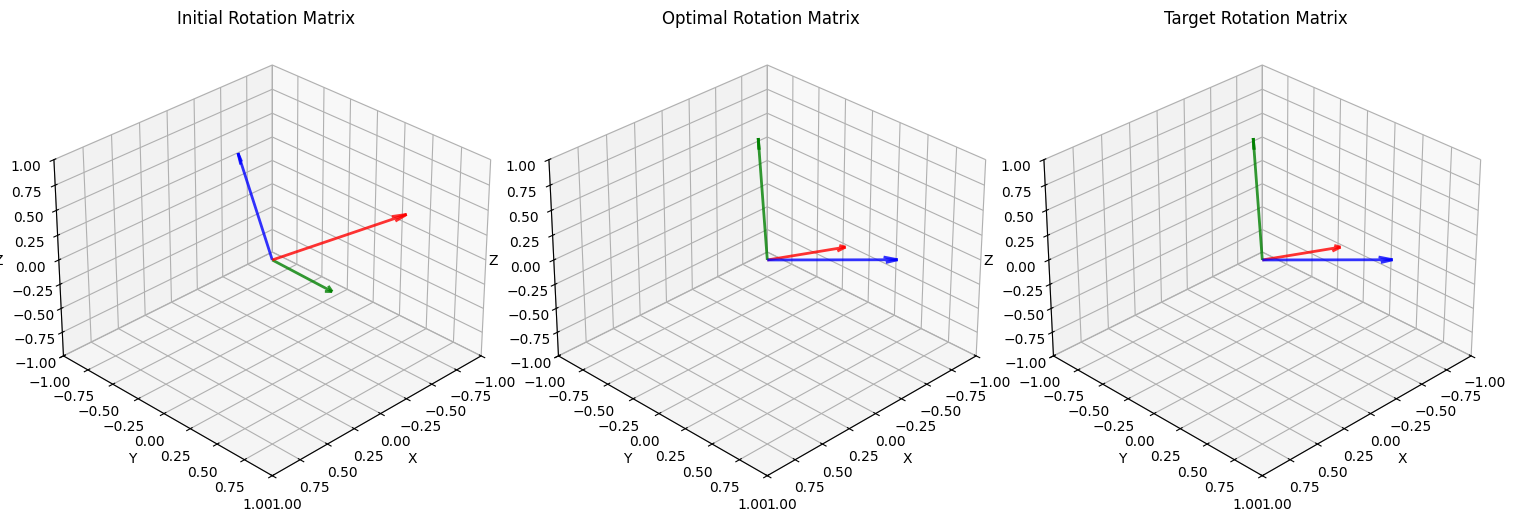

In [3]:
# 1. Define the special orthogonal group manifold
so3 = rx.SpecialOrthogonal(n=3)

# 2. Create a target rotation matrix
key = jax.random.PRNGKey(0)
target_matrix = so3.random_point(key)

# 3. Define the optimization problem - Minimize squared Frobenius norm
def cost_fn(X):
    # Squared Frobenius norm: ||X - target_matrix||_F^2
    diff = X - target_matrix
    return jnp.sum(diff * diff)

problem = rx.RiemannianProblem(so3, cost_fn)

# 4. Set a random initial point
key = jax.random.PRNGKey(42)
X0 = so3.random_point(key)

# 5. Solve the problem
result = rx.minimize(
    problem, X0, method="rsgd", options={"learning_rate": 0.1, "max_iterations": 200}
)

# 6. Display results
print(f"Cost function value: {result.fun}")
print(f"Number of iterations until convergence: {result.niter}")

# Calculate distances between matrices
init_distance = jnp.linalg.norm(X0 - target_matrix)
final_distance = jnp.linalg.norm(result.x - target_matrix)
print(f"Distance between initial point and target: {init_distance}")
print(f"Distance between optimal solution and target: {final_distance}")

# 7. Visualization
fig = plot_rotation_matrices(
    [X0, result.x, target_matrix],
    titles=["Initial Rotation Matrix", "Optimal Rotation Matrix", "Target Rotation Matrix"],
)
plt.savefig("output/so3_optimization.png")
plt.show()